The Claude 3 models have sophisticated vision capabilities on par with other leading models. They demonstrate a strong aptitude for understanding a wide range of visual formats, including photos, charts, graphs and technical diagrams. 

Anthropic’s Claude 3 Sonnet foundation model is now generally available on Amazon Bedrock. 


### For text input

The Claude 3 family of models (Claude 3 Opus, Claude 3 Sonnet, and Claude 3 Haiku) is the next generation of state-of-the-art models from Anthropic. For the vast majority of workloads, Sonnet is faster on inputs and outputs than Anthropic’s Claude 2 and 2.1 models, with higher levels of intelligence. Sonnet is also more steerable, delivering more predictable and higher quality outcomes. 

Anthropic Claude Messages API
https://docs.aws.amazon.com/bedrock/latest/userguide/model-parameters-anthropic-claude-messages.html

In [41]:
news = """
Notice on New Trading Pairs & Trading Bots Services on Binance Spot - 2024-03-21

Fellow Binancians,
To expand the list of trading choices offered on Binance Spot and enhance users’ trading experience, Binance will open trading for the AAVE/TRY, ARKM/FDUSD, CRV/TRY, FET/BRL, RAY/FDUSD and RNDR/EUR trading pairs at 2024-03-21 08:00 (UTC).
In addition, Binance will enable Trading Bots services for the following trading pairs at 2024-03-21 08:00 (UTC): 
* Spot Grid, Spot DCA & Rebalancing Bot: AEVO/USDT, BOME/USDT
* Spot Algo Orders: AAVE/TRY, ARKM/FDUSD, CRV/TRY, FET/BRL, RAY/FDUSD, RNDR/EUR
* 
Notes:
* BRL, EUR and TRY are fiat currencies and do not represent any other digital currencies.
* Users will enjoy zero maker fees on FDUSD trading pairs until further notice.
* There may be discrepancies in the translated version of this original article in English. Please reference this original version for the latest or most accurate information where any discrepancies may arise. 
Thank you for your support!
Binance Team
"""

instruction = """
Please analyze the text and provide the following information:

What is the spot pair we can trade and when ?
"""

messages = [
  {"role": "user", "content": news+instruction},
]

In [44]:
news = """
SOL总锁定价值年内激增近200％ 市值突破900亿美元成第4大加密货币
在过去24小时内，SOL价格上涨超过9%，报价为202.03美元，相较于2021年11月创下的历史最高价259.69美元，目前仍有约22%的差距。

市值超过了币安币
在过去一周内，Solana（SOL）的表现异常亮眼，尤其是在比特币、以太币等主要加密货币经历震荡回调的同时，SOL却一路攀升，周增长超过44%，并在3月18日 突破了200美元的重要心理关口，市值超过了币安币（BNB），达到了900亿美元，成为全球第四大加密货币。

WIF、BONK和BOME等迷因币发力
随着Solana生态系统的复苏和生态中的迷因币在加密货币社区中流行，尤其是迷因币的表现亮眼，包括WIF、BONK和BOME，成为了交易量和受关注度增加的关键因素 ，这些迷因币助力Solana的去中心化交易所（DEX）在过去几个月里多次超过以太坊的交易量。 而SOL的价格过去一年涨幅超过850%，同时也吸引了资金流入到各大DeFi协议中，推动Solana的总锁定价值（TVL）突破了42亿美元。

补充一点，根据DefiLlama的数据，Solana的TVL自今年以来增长了超过198.87%，从1月1日的14.17亿美元增长至现在的42.35亿美元。

新代币发行量超越以太坊
在SPL代币标准下，Solana网络的新代币发行量也呈现出明显的增长。 仅在过去一周，该网络平均每天就成功发行了超过7800个新代币。 根据Solscan的数据，3月11日的新代币发行量达到了9690个，刷新了单日发行量的纪录。
"""

instruction = """
Please analyze the text and provide the following information in English:

1. The overall sentiment (bullish or bearish) expressed in the news about the cryptocurrency market.
2. Identify which cryptocurrencies are mentioned and summarize the sentiment (bullish or bearish) toward each one.
3. Discuss the relevance of the news for potential investors or traders, including any specific figures or data points that might influence market behavior.
"""

messages = [
  {"role": "user", "content": news+instruction},
]

In [45]:
import boto3
import json

# Create a Boto3 client for Bedrock Runtime
bedrock_client = boto3.client(service_name='bedrock-runtime')

# Define the prompt and other parameters
modelId = 'anthropic.claude-3-sonnet-20240229-v1:0'
accept = 'application/json'
contentType = 'application/json'

# Invoke the model
response = bedrock_client.invoke_model(
    modelId=modelId,
    accept=accept,
    contentType=contentType,
    body=json.dumps({
        "anthropic_version": "bedrock-2023-05-31", 
        "messages": messages, 
        "max_tokens": 300, 
        "temperature": 0.1, 
        "top_p": 0.9})
)

In [46]:
# Process the response
response_body = json.loads(response.get('body').read())
print(response_body['content'][0]['text'])

1. The overall sentiment expressed in the news about the cryptocurrency market is bullish, particularly towards Solana (SOL) and its ecosystem.

2. The cryptocurrencies mentioned in the news are:
- Solana (SOL): The sentiment towards SOL is highly bullish, highlighting its significant price increase, market cap growth, and the surge in its total value locked (TVL).
- Bitcoin (BTC) and Ethereum (ETH): The news implies a bearish sentiment towards these major cryptocurrencies, stating that they experienced volatility and pullbacks while SOL continued to rise.
- Binance Coin (BNB): The news is neutral towards BNB, only mentioning that SOL's market cap surpassed BNB's.
- Meme coins like WIF, BONK, and BOME: The sentiment towards these meme coins is bullish, as they are credited for contributing to the increased trading volume and attention on Solana's decentralized exchanges (DEXs).

3. The news is highly relevant for potential investors and traders, as it provides several key data points t

#### The response body returns the token usage as well e.g. 'usage': {'input_tokens': 38, 'output_tokens': 280}}

In [22]:
response_body

{'id': 'msg_01ECKmmG772XtU5muSsA7Edk',
 'type': 'message',
 'role': 'assistant',
 'content': [{'type': 'text',
   'text': 'According to the image, the current price of Bitcoin (BTC) is $63,590.23 as of the time shown, which is an increase of 0.08% over the previous day.\n\nThe chart displays the price fluctuations of Bitcoin over a 1-day period, showing the ups and downs throughout different times of the day. The overall trend appears to be volatile, with significant price swings in both upward and downward directions.\n\nRegarding public sentiment, the image shows a poll asking "How do you feel about Bitcoin today?". The results indicate that 454 people voted "Good", while 409 people voted "Bad". Although the "Good" votes are slightly higher, the sentiment seems relatively divided, with a fairly close split between positive and negative views on Bitcoin for that particular day.'}],
 'model': 'claude-3-sonnet-28k-20240229',
 'stop_reason': 'end_turn',
 'stop_sequence': None,
 'usage': 

### For multimodal input with images



In [16]:
test_image = "bitcoin_21_Mar.png"

In [17]:
def encode_image(img_file):
    with open(img_file, "rb") as image_file:
        img_str = base64.b64encode(image_file.read())
        base64_string = img_str.decode("latin1")
    return base64_string

#### You can check out the food image and the generated description

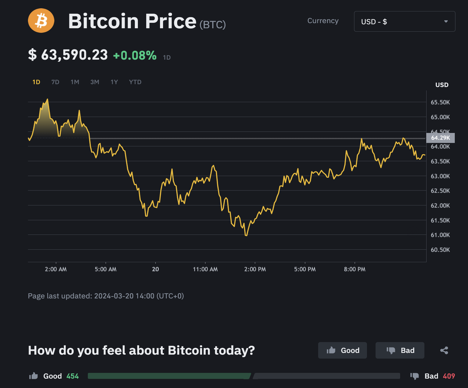

In [37]:
from PIL import Image
import base64

raw_image = Image.open(test_image).convert('RGB')
display(raw_image.resize((468, 388)))

In [38]:
messages = [
  {"role": "user", 
   "content": [
            { "type": "image", "source": { "type": "base64", "media_type": "image/jpeg", "data": encode_image(test_image) } },
            { "type": "text", "text": "What is the price of Bitcoin at this moment and the trend of it? Also, let me what people feel about Bitocin today" }
      ]}
]

In [39]:
import boto3
import json

# Create a Boto3 client for Bedrock Runtime
bedrock_client = boto3.client(service_name='bedrock-runtime')

# Define the prompt and other parameters
modelId = 'anthropic.claude-3-sonnet-20240229-v1:0'
accept = 'application/json'
contentType = 'application/json'

# Invoke the model
response = bedrock_client.invoke_model(
    modelId=modelId,
    accept=accept,
    contentType=contentType,
    body=json.dumps({
        "anthropic_version": "bedrock-2023-05-31", 
        "messages": messages, 
        "max_tokens": 300, 
        "temperature": 0.1, 
        "top_p": 0.9})
)

In [40]:
# Process the response
response_body = json.loads(response.get('body').read())
print(response_body['content'][0]['text'])

According to the image, the current price of Bitcoin (BTC) is $63,590.23 as of the time shown, which is an increase of 0.08% over the previous day.

The chart displays the price fluctuations of Bitcoin over a 1-day period, showing the ups and downs throughout different times of the day. The overall trend appears to be volatile, with significant price swings in both upward and downward directions.

Regarding public sentiment, the image shows a poll asking "How do you feel about Bitcoin today?". The results indicate that 454 people voted "Good", while 409 people voted "Bad". Although the "Good" votes are slightly higher, the sentiment seems relatively divided or mixed based on the close vote counts.
